# Primeira Avaliação - Fase _Measure_

## Parte 01

Em 1995, Marcos criou seu primeiro restaurante: a Lanchoneteria. No restaurante apenas trabalhavam Suzane, esposa de Marcos, que era responsável por cuidar do caixa e dos pedidos, e o próprio Marcos, que era responsável pela cozinha. Conforme os anos passaram o restaurante foi ficando famoso e cada vez mais pessoas queriam fazer suas refeições lá, afinal o lanche era muito gostoso. Tanto que Antônio, o filho de Marcos e Suzane, decidiu ajudá-los no restaurante. Ele também reparou que, embora o lanche fosse gostoso, muitas vezes o mesmo tipo de lanche saía de formas diferentes, ou então, que em determinados dias o tempo de espera era muito grande.
     Antônio teve, então, uma ideia: pediu para que seu pai cronometrasse o tempo levado para fazer os lanches. Assim, ele poderia ver como que o tempo de espera variava, dependendo do pedido feito.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df1 = pd.read_excel(io = 'dados_1.xlsx', sheet_name = 'Lanchoneteria - tempo de espera') 
df2 = pd.read_excel(io = 'dados_1.xlsx', sheet_name = 'Lanchoneteria - lanches mais pe') 
df3 = pd.read_excel(io = 'dados_1.xlsx', sheet_name = 'Lanchoneteria - nova filial') 

### 1) Para ver como o tempo de espera varia em cada dia da semana, qual tipo de gráfico é o mais adequado para Antônio?

<span style="color:red"> Resp:  Gráfico de Frequência. </span>

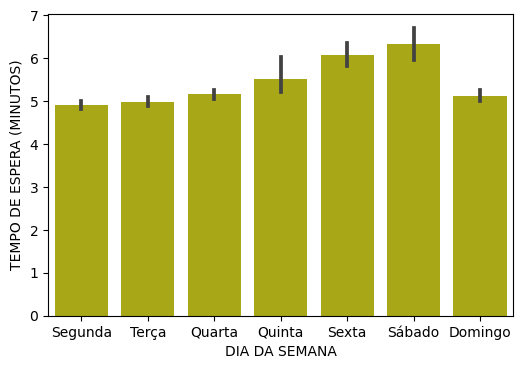

In [4]:
df1 = df1.iloc[:, 0:4]


plt.figure(dpi = 100)
sns.barplot(data = df1, x = 'DIA DA SEMANA', y = 'TEMPO DE ESPERA (MINUTOS)',  color = 'y');

### 2) Qual foi a média de tempo de espera de um cliente na terça-feira? Quanto tempo esperou o cliente que recebeu o lanche mais rápido para esse dia? Ainda na terça, qual foi o tempo de espera do cliente que teve que esperar mais?

<span style="color:red"> Resp: 4.99, 4.60, 5.31 </span>

In [5]:
df1.groupby('DIA DA SEMANA').agg({
    'TEMPO DE ESPERA (MINUTOS)': ['mean', 'min', 'max']
})

TEMPO DE ESPERA (MINUTOS)            
                                   mean   min   max
DIA DA SEMANA                                      
Domingo                        5.130588  4.70  5.74
Quarta                         5.160625  4.70  5.55
Quinta                         5.520000  4.81  9.49
Segunda                        4.914000  4.57  5.13
Sexta                          6.076286  4.65  7.20
Sábado                         6.340714  4.59  8.85
Terça                          4.989333  4.60  5.31

### 3) Marcos disse ao seu filho que houve um dia na semana em que o gás acabou, e por isso houve um pedido que demorou mais tempo que os demais. Antônio respondeu que encontraria essa causa especial vendo a variação natural do processo para cada dia no período da tarde e da noite, e que no dia que ocorreu a troca do gás provavelmente haveria uma variação de causa especial. Assim, qual foi esse dia? 

<span style="color:red"> Resp: Quinta </span>

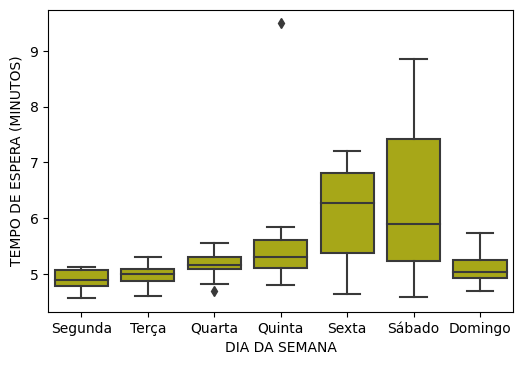

In [6]:
plt.figure(dpi = 100)
sns.boxplot(data = df1, x = 'DIA DA SEMANA', y = 'TEMPO DE ESPERA (MINUTOS)',  color = 'y');

### 4) Criando os gráficos para cada dia da semana, para qual dia da semana é possível ver uma clara diferença na média do tempo de espera entre o período da tarde e da noite?

<span style="color:red"> Resp: Sexta </span>

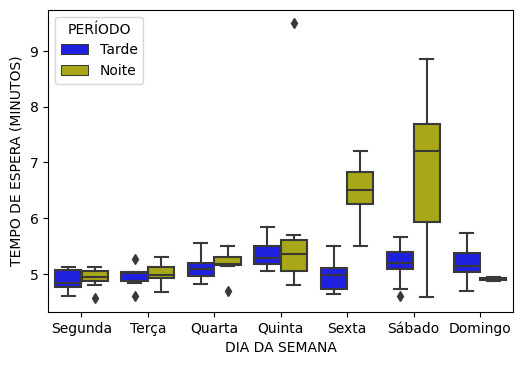

In [7]:
plt.figure(dpi = 100)
sns.boxplot(data = df1, x = 'DIA DA SEMANA', y = 'TEMPO DE ESPERA (MINUTOS)', hue = 'PERÍODO', palette = ['b', 'y']);

## Parte 02

Agora que os lanches eram entregues mais rapidamente, a Lanchoneteria decolou! Marcos pretende abrir um restaurante na cidade vizinha, e para isso precisa entender quais são os lanches mais pedidos, para abastecer a cozinha da filial. Para isso, Suzane anotou todos os lanches pedidos em um dia, e passou para uma planilha online.

### 1) Para qual lanche Marcos precisa de um estoque de ingredientes maior, e qual o lanche cujo estoque de ingredientes pode ser o menor?

<span style="color:red"> Resp: Misto Quente e Natural </span>

In [8]:
df2.groupby('Lanche').size().sort_values()

Lanche
NATURAL          9
MORTADELA       16
HAMBÚRGUER      20
X-BURGUER       25
MISTO QUENTE    30
dtype: int64

### 2) Considerando os quatro dias, quantos lanches do tipo "Misto Quente" foram pedidos na parte da tarde?

<span style="color:red"> Resp: 22 </span>

In [9]:
df2.groupby(['Turno', 'Lanche']).size()

Turno  Lanche      
NOITE  HAMBÚRGUER      17
       MISTO QUENTE     8
       MORTADELA        5
       NATURAL          2
       X-BURGUER       22
TARDE  HAMBÚRGUER       3
       MISTO QUENTE    22
       MORTADELA       11
       NATURAL          7
       X-BURGUER        3
dtype: int64

### 3) O gráfico de barras apresentado abaixo melhor representa qual dia?

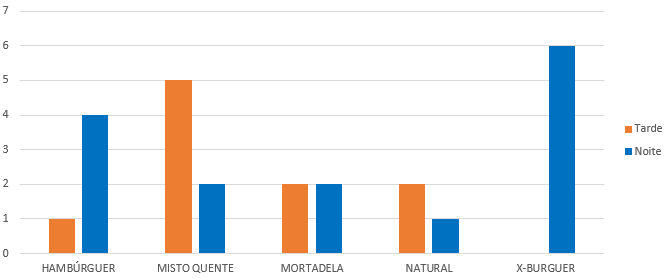

<span style="color:red"> Resp: 1 </span>

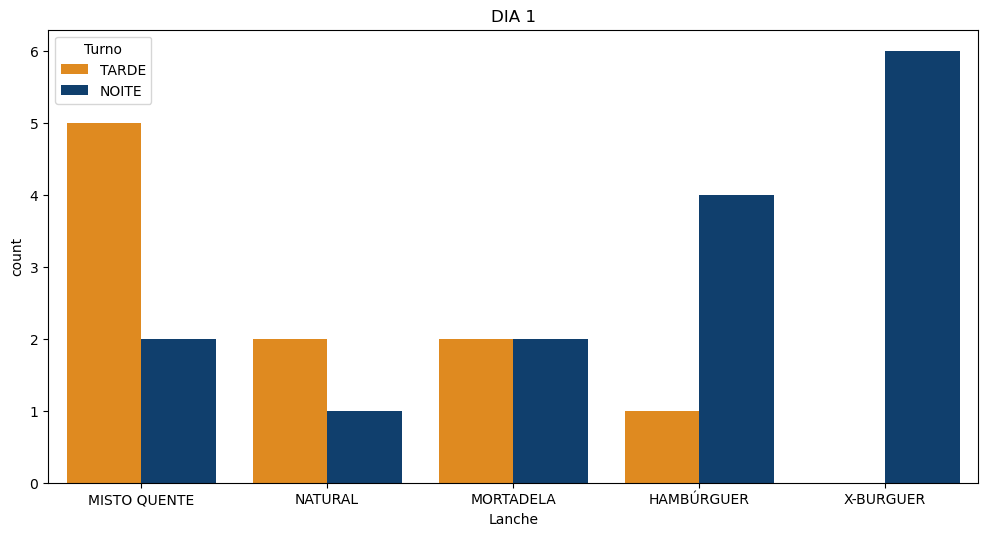

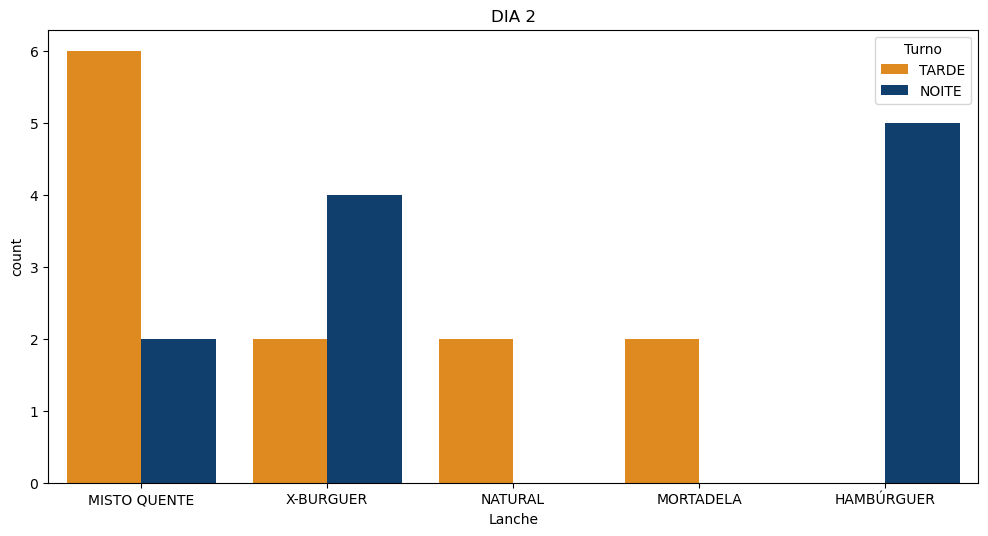

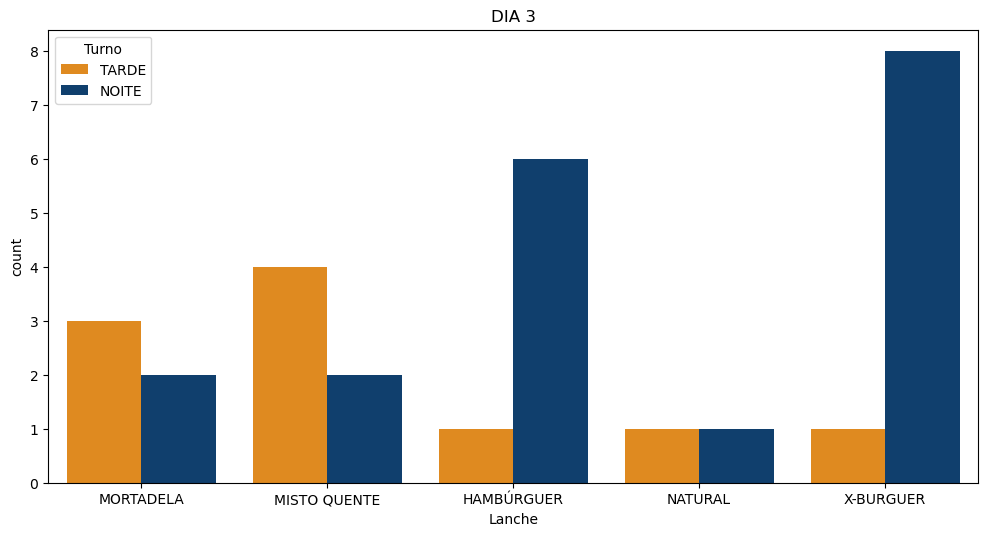

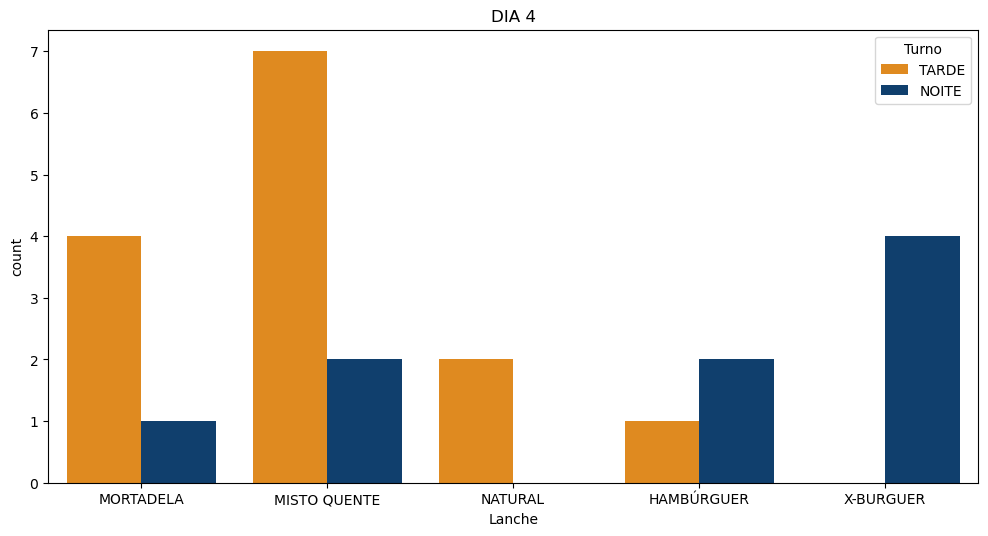

In [10]:
for i in range(1, 5):
    plt.figure(figsize = (12, 6), dpi = 100)
    df2_ = df2.loc[df2['Dia'] == i, :]
    plt.title(f'DIA {i}')
    sns.countplot(data = df2_, x = 'Lanche', hue = 'Turno', palette = ['#FF8E00', '#003F7D'])
    

### 4) Ao todo, qual foi o turno em que mais pedidos foram feitos?

<span style="color:red"> Resp: Noite </span>

In [11]:
df2['Turno'].value_counts()

NOITE    54
TARDE    46
Name: Turno, dtype: int64

### 4) Qual o lanche mais vendido no período da noite? Quantos desse lanche foram vendidos em todas as noites somadas? 

<span style="color:red"> Média de 4 lanches, vendeu menos no dia 2. </span>

In [12]:
df2_ = df2.groupby(['Lanche', 'Dia']).size().loc['MORTADELA']

print(df2_.mean())
df2_

4.0


Dia
1    4
2    2
3    5
4    5
dtype: int64

## Parte 03

Finalmente, a filial da Lanchoneteria foi aberta na cidade vizinha! O gerente da nova filial decidiu fazer uma enquete para decidir qual aspecto do restaurante os clientes mais gostavam (As escolhas eram: Sabor, Temperatura do lanche, Atendimento, Decoração do restaurante, Velocidade de preparo e Outros). Além disso, ele pediu para os clientes darem uma nota de 0 a 10 para a loja. 

### 1) Construa um gráfico de Pareto para os aspectos do restaurante que os clientes mais gostaram. Com base nesse gráfico, qual o aspecto mais importante para os clientes?

<span style="color:red"> Resp: Sabor. </span>

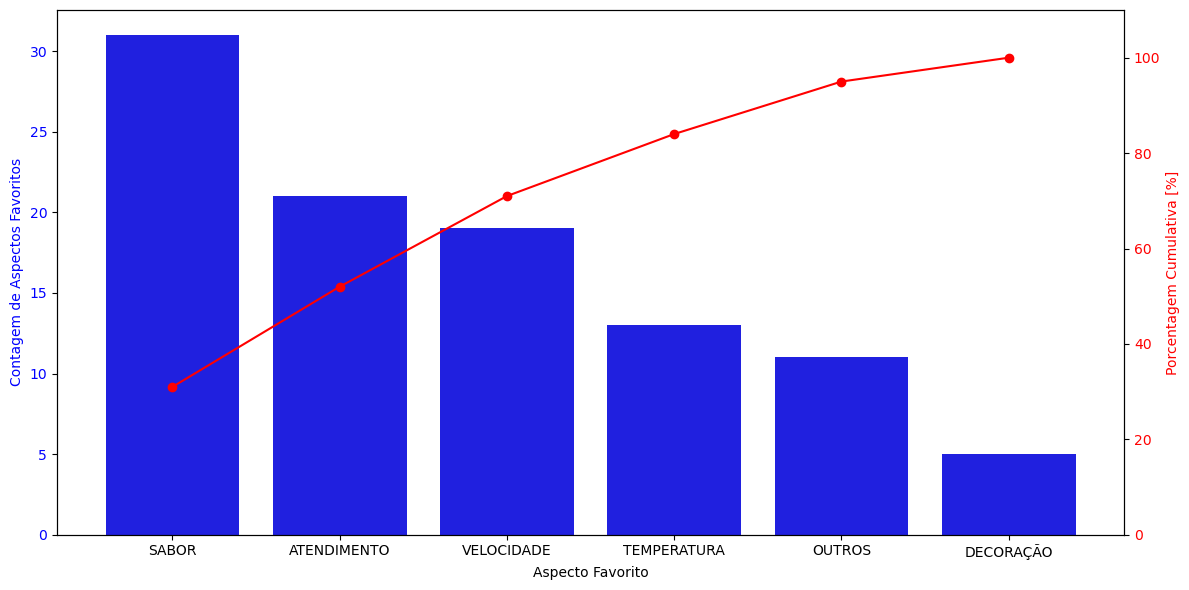

In [13]:
df3_ = df3['Aspecto Favorito'].value_counts(ascending = 0)

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 100)
sns.countplot(data = df3, x = 'Aspecto Favorito', order = df3_.index, color = 'b', ax = ax)
ax.tick_params(axis='y', labelcolor='b')
ax.set_ylabel('Contagem de Aspectos Favoritos', color = 'b')

ax2 = ax.twinx()

ax2.plot(range(6), np.cumsum(df3_), ls='-', marker='o', color='r')
ax2.set_ylabel('Porcentagem Cumulativa [%]', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 110)

fig.tight_layout()

### 2) A soma das porcentagens de quais aspectos equivale a 44% das respostas? 

<span style="color:red"> Resp: Sabor e Temperatura. </span>

In [14]:
df3_ / (df3_.sum()) # 31% + 13% = 44%

SABOR          0.31
ATENDIMENTO    0.21
VELOCIDADE     0.19
TEMPERATURA    0.13
OUTROS         0.11
DECORAÇÃO      0.05
Name: Aspecto Favorito, dtype: float64

### 3) Ao construir um histograma para as notas dadas pelos clientes, qual a centralidade observada?

<span style="color:red"> Resp: 8,5. </span>

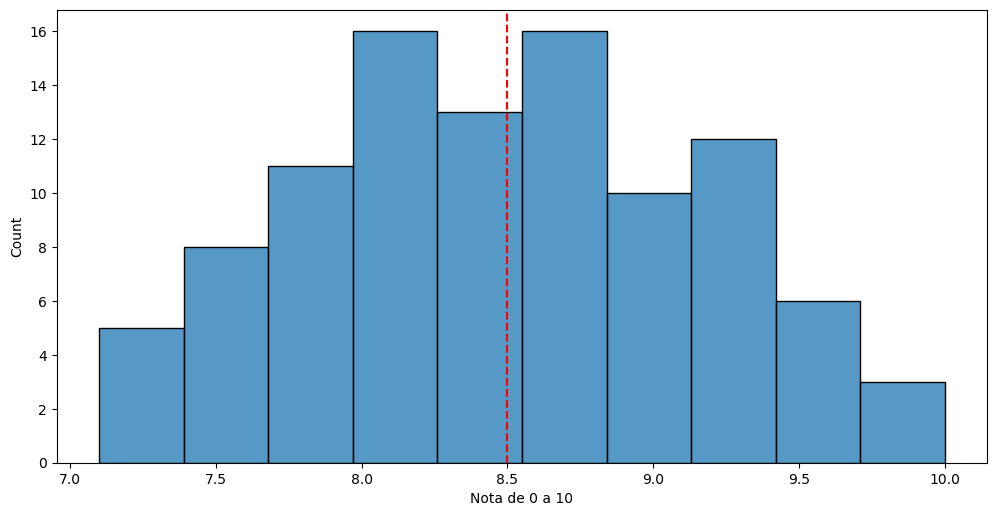

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 100)
sns.histplot(data = df3, x = 'Nota de 0 a 10', bins = 10)
plt.axvline(df3['Nota de 0 a 10'].median(), ls = '--', color = 'r')

### 4) Qual o limite inferior do histograma para as notas dadas pelos clientes?

<span style="color:red"> Resp: 7,1. </span>

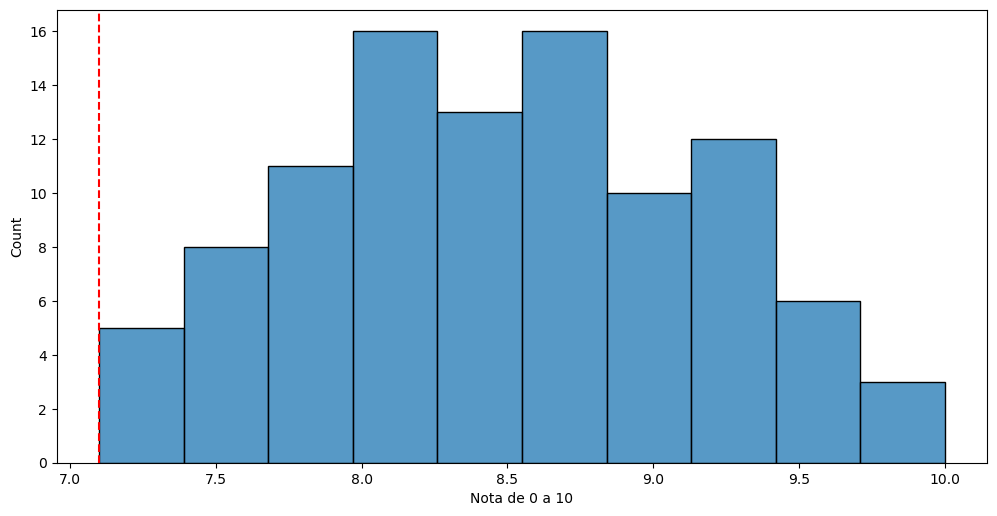

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 100)
sns.histplot(data = df3, x = 'Nota de 0 a 10', bins = 10)
plt.axvline(df3['Nota de 0 a 10'].min(), ls = '--', color = 'r')